In [1]:

import seaborn as sns
from sklearn import metrics, model_selection, tree
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model



✍ Должно быть, вы уже заметили, что визуализация — очень полезный инструмент для отслеживания проблем в процессе обучения.

Например, может быть полезно построить график ошибки на тренировочной и валидационной выборках в зависимости от какого-то параметра модели. Если график ошибки на валидации становится выше, чем график ошибки на обучении, то можно сказать, что модель переобучилась.

Ниже приведён пример такого графика для градиентного бустинга (один из видов ансамблевых моделей) из 500 деревьев решений. На графике показано, как меняется функция ошибки (logloss) в зависимости от количества добавленных в ансамбль деревьев. Видно, что примерно на 150-й итерации ошибка на валидационной выборке начинает увеличиваться, а вот на тренировочной выборке продолжает падать.

![Скриншот](./img//Screenshot_61.png)


Такая кривая называется валидационной кривой (validation curve), и она позволяет увидеть, как изменяется метрика в зависимости от значения внешнего параметра.

В этом модуле мы поговорим о других графиках, называемых кривыми обучения (learning curve). Они позволяют легко определять наличие переобучения и недообучения, визуально сравнивать модели между собой и увидеть, как качество модели зависит от добавления новых данных.

## ИДЕЯ КРИВОЙ ОБУЧЕНИЯ ##

Давайте последовательно придём к тому, что такое кривая обучения и как она строится.

Представим, что мы решаем некоторую задачу регрессии. У нас есть некоторый абстрактный набор данных, состоящий из 100 наблюдений. В нём есть два столбца: x — фактор и y — целевой признак.

Мы разделяем данные на тренировочный и валидационный наборы в соотношении 80/20.

Возьмём одно наблюдение из обучающего набора данных и построим некоторую модель, например линейную регрессию. Затем измеряем метрику, например, MSE, в проверочном наборе и в этом единственном обучающем экземпляре. Ошибка в обучающем объекте будет равна 0, так как довольно легко идеально подогнать прямую под одну точку. Однако ошибка в проверочном наборе будет очень большой.

![Скриншот](./img//Screenshot_62.png)


Теперь давайте построим ту же самую модель на десяти наблюдениях из обучающего набора данных. Так как мы используем больше наблюдений для обучения, то ошибка на тренировочной выборке увеличится, а на валидационной — упадёт.

![Скриншот](./img//Screenshot_63.png)


Будем продолжать процедуру, подавая на вход модели всё больше данных из обучающего набора, но не меняя валидационный набор.

В пределе мы будем использовать весь обучающий набор данных для обучения. Ошибки на каждом из наборов данных вновь изменятся в большую или меньшую сторону.



![Скриншот](./img//Screenshot_64.png)


Наконец, если мы построим график эволюции метрики, по которой измеряем качество модели, по мере добавления всё новых и новых данных, мы получим примерно следующие кривые:

![Скриншот](./img//Screenshot_65.png)


Построенные кривые и называются кривыми обучения. Теперь мы можем дать формальное определение этому термину

Кривая обучения (learning curve) — это график зависимости некоторой метрики на обучающем (валидационном) наборе данных от количества объектов, которые участвуют в обучении модели.

Аналогично строятся кривые обучения для задачи классификации. В этом случае вместо метрик регрессии используются метрики классификации. Идея и принцип построения остаются теми же.

![Скриншот](./img//Screenshot_66.png)


![Скриншот](./img//Screenshot_67.png)


![Скриншот](./img//Screenshot_68.png)


![Скриншот](./img//Screenshot_69.png)


![Скриншот](./img//Screenshot_70.png)


## ПОСТРОЕНИЕ КРИВОЙ ОБУЧЕНИЯ ##

Давайте научимся строить кривые обучения с помощью Python. 

Для вычисления точек для построения кривых обучения в модуле model_selection библиотеки sklearn есть функция learning_curve().

![Скриншот](./img//Screenshot_71.png)


![Скриншот](./img//Screenshot_72.png)


In [2]:
import pandas as pd
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)

In [3]:
#Создаём модель
model = tree.DecisionTreeClassifier(
  criterion='entropy',max_depth=7, min_samples_leaf=5,class_weight='balanced',random_state=42
)
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Вычисляем координаты для построения кривой обучения
train_sizes, train_scores , valid_scores = model_selection.learning_curve(
  estimator=model, X=X, y=y,cv=skf, scoring='f1'
)
print('Train sizes: \n', train_sizes)
print('Train scores: \n', train_scores)
print('Valid scores: \n', valid_scores)

Train sizes: 
 [ 80 260 440 620 800]
Train scores: 
 [[0.91489362 0.89473684 0.89473684 0.89473684 0.89473684]
 [0.89962825 0.91385768 0.91512915 0.91512915 0.91512915]
 [0.90153173 0.89519651 0.91938998 0.91416309 0.91416309]
 [0.90542636 0.90734824 0.92209857 0.90909091 0.9057187 ]
 [0.90794451 0.90012642 0.90813648 0.9041769  0.9081761 ]]
Valid scores: 
 [[0.78448276 0.77714286 0.75268817 0.8342246  0.83597884]
 [0.79069767 0.8172043  0.82352941 0.85436893 0.83902439]
 [0.87254902 0.82291667 0.81730769 0.85436893 0.85294118]
 [0.84210526 0.82795699 0.83168317 0.8195122  0.86138614]
 [0.86567164 0.87046632 0.82051282 0.83       0.86294416]]


Для того чтобы вычислить среднюю кросс-валидационную метрику на каждом из наборов данных, необходимо рассчитать среднее по столбцам матриц train_scores и valid_scores:

In [4]:
import numpy as np
from matplotlib import pyplot as plt

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
 
print('Train k-fold f1 scores',  train_scores_mean)
print('Valid k-fold f1 scores',  valid_scores_mean)

Train k-fold f1 scores [0.8987682  0.91177468 0.90888888 0.90993656 0.90571208]
Valid k-fold f1 scores [0.79690344 0.82496494 0.8440167  0.83652875 0.84991899]


Теперь можно построить графики кривых обучения:



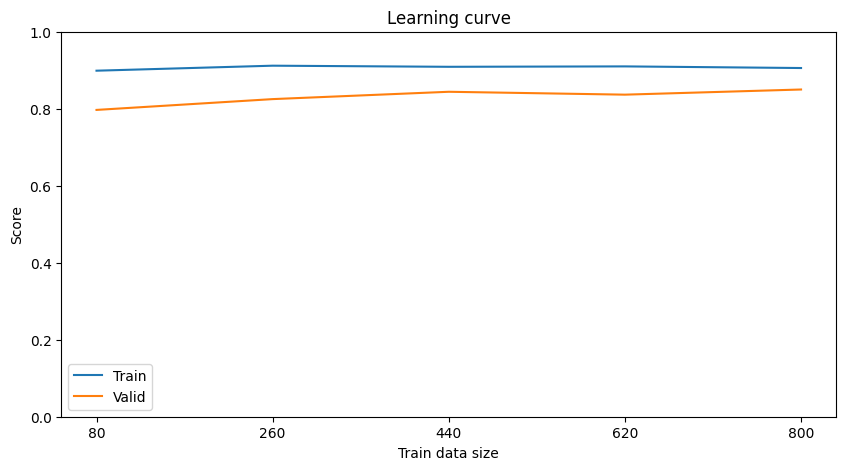

In [5]:
#Визуализируем кривую обучения
from matplotlib import pyplot as plt


fix, ax = plt.subplots(figsize = (10,5)) #фигура + координатная плоскость
#Строим кривую обучения по метрикам на тренировочных фолдах
ax.plot(train_sizes, train_scores_mean, label='Train')
#Строим кривую обучения по метрикам на валидационных фолдах
ax.plot(train_sizes, valid_scores_mean, label='Valid')
#Даём название графику и подписи осям
ax.set_title('Learning curve')
ax.set_xlabel('Train data size')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси абсцисс
ax.xaxis.set_ticks(train_sizes)
#Устаналиваем диапазон оси ординат
ax.set_ylim(0, 1)
#Отображаем легенду
ax.legend()


![Скриншот](./img//Screenshot_73.png)


Для удобства дальнейшего использования описанных выше действий для построения кривой обучения давайте обернём их в функцию plot_learning_curve(). У функции будет несколько аргументов: модель, набор данных (X, y), кросс-валидатор, метрика, координатная плоскость matplotlib, на которой будет строиться график, и подпись графика:

In [6]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

Примечание. Вы можете сохранить написанную нами функцию и обращаться к ней в своих задачах. Она не раз вам пригодится в исследованиях.

![Скриншот](./img//Screenshot_74.png)


In [8]:
#Создаём список из моделей
from sklearn import linear_model


models = [
    linear_model.LogisticRegression(
        max_iter=1000, #количество итераций на сходимость
        random_state=42, #генератор случайных чисел
        class_weight='balanced' #веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy', #критерий информативности
        max_depth=7, #максимальная глубина
        min_samples_leaf=5, #минимальное число объектов в листе
        random_state=42, #генератор случайных чисел 
        class_weight='balanced' #веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy', #критерий информативности
        random_state=42, #генератор случайных чисел 
        class_weight='balanced' #веса классов
    ),
]

Наконец, построим кривые обучения для каждой из моделей. Для этого заранее создадим k-fold-кросс-валидатор со стратификацией на пять фолдов. Создадим фигуру с тремя координатными плоскостями. Реализуем цикл по составленному списку из моделей и их индексам (они нам понадобятся для отображения на соответствующих координатных плоскостях). Внутри цикла будем вызывать нашу функцию plot_learning_curve():

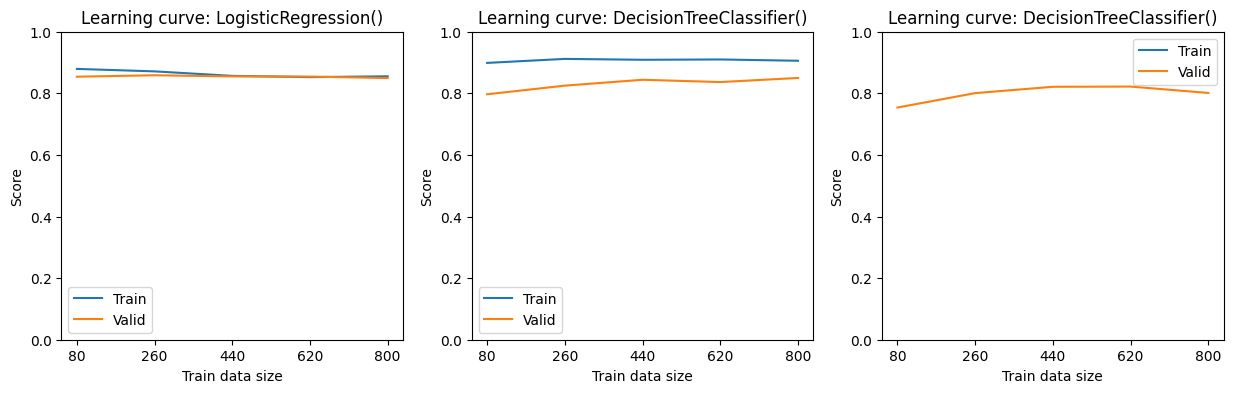

In [9]:
#Создаем объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
fig, axes = plt.subplots(1,3, figsize=(15,4)) #фигура + 3 координатных плоскости
#Создаем цикл по списку моделей и индексам этого списка
for i, model in enumerate(models) :
  plot_learning_curve(model,X,y, skf, ax=axes[i], title=model.__class__.__name__ + '()')


![Скриншот](./img//Screenshot_75.png)
